###  Performance of MDFF-EnTK replica runs (configuration = 1.8angstrom resolution)

- Baseline: 16ns for adk system with 1.8A resolution for single replica
- replica runs (parallel): 16 iterations for 16ns

In [1]:
import pandas as pd
import numpy as np

### sessions
- 32replicas, 16iterations, 40ps: re.session.login2.hrlee.018724.0001.tar.gz 
- 16replicas, 16iterations, 62.5ps: re.session.login3.hrlee.018721.0004.tar.gz
- 8replicas, 16iterations, 125ps: re.session.login3.hrlee.018721.0003.tar.gz 
- 4replicas, 16iterations, 250ps: re.session.login3.hrlee.018721.0001.tar.gz
- 1replica, 1iteration, 16ns: re.session.login3.hrlee.018821.0000

In [170]:
one_replica = [748] + [None] * 15
four_replica = [140,279,271,268,270,137,137,138,138,136,167,259,135,263,144,137]
eight_replica = [62,73,146,142,149,139,147,75,127,71,81,80] + [None] * 4
eight_replica = [62,73,146,142,149,139,147,75,127,71,81,80] + [np.mean([62,73,146,142,149,139,147,75,127,71,81,80])] * 4

sixteen_replica = [34,70,42,40,39,41,72,42,40,44,40,45,69,39,44,39]
thirtytwo_replica = [28,26,26,25,25,28,28,28,36,29,29,26,30,28,36,27]

In [185]:
replicas_elapsed = {
    '1replica': one_replica,
    '4replica':  four_replica,
    '8replica':  eight_replica,
    '16replica': sixteen_replica,
    '32replica': thirtytwo_replica
}
# conversion of sec to node hour
replicas_elapsed_hr = {}
for k, v in replicas_elapsed.items():
    tmp = []
    for x in v:
        if x:
            tmp.append(x / 60. / 60.)
        else:
            tmp.append(x)
    replicas_elapsed_hr[k] = tmp
df_elapsed_sec = pd.DataFrame.from_dict(replicas_elapsed)    
df_elapsed = pd.DataFrame.from_dict(replicas_elapsed_hr)
df_elapsed

,1replica,4replica,8replica,16replica,32replica
0,0.207778,0.038889,0.017222,0.009444,0.007778
1,NaN,0.077500,0.020278,0.019444,0.007222
2,NaN,0.075278,0.040556,0.011667,0.007222
3,NaN,0.074444,0.039444,0.011111,0.006944
4,NaN,0.075000,0.041389,0.010833,0.006944
5,NaN,0.038056,0.038611,0.011389,0.007778
6,NaN,0.038056,0.040833,0.020000,0.007778
7,NaN,0.038333,0.020833,0.011667,0.007778
8,NaN,0.038333,0.035278,0.011111,0.010000
9,NaN,0.037778,0.019722,0.012222,0.008056


In [171]:
def acc(data):
    tmp=[]
    for x in data:
            if x:
                tmp.append(x / 60. / 60.)
            else:
                tmp.append(x)
            idx = len(tmp) - 1
            if len(tmp) > 1:
                if tmp[idx] != None:
                    tmp[idx] += tmp[idx-1]
    return tmp
d8 = pd.DataFrame(acc(eight_replica),columns=['eight'], index=[x *.125 * 8 for x in range(1,17)])
d4 = pd.DataFrame(acc(four_replica),columns=['four'], index=[x *.250 * 4 for x in range(1,17)])                  
d16 = pd.DataFrame(acc(sixteen_replica),columns=['sixteen'], index=[x *.0625 * 16 for x in range(1,17)])                  
d32 = pd.DataFrame(acc(thirtytwo_replica),columns=['thirytwo'], index=[x *.04 * 32 for x in range(1,17)])                  
d1 = pd.DataFrame(acc([one_replica[0]]), columns=['one'], index=[16])

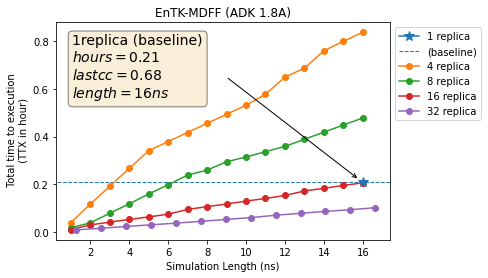

In [191]:
ax = d1.plot(marker='*', markersize=10, zorder=10)
ax.axhline(y=float(d1.iloc[0]), xmin=-1, xmax=1, color='#1f77b4', linestyle='--', lw=1)

d4.plot(ax=ax, marker='o')
d8.plot(ax=ax, marker='o')
d16.plot(ax=ax,marker='o')
d32[d32.index < 17].plot(ax=ax,marker='o')
ax.set_xlabel("Simulation Length (ns)")
ax.set_ylabel(" Total time to execution\n (TTX in hour)")
ax.set_title('EnTK-MDFF (ADK 1.8A)')

textstr = '\n'.join((
    r'1replica (baseline)' ,
    r'$hours=%.2f$' % (df_elapsed['1replica'][0], ),
    r'$last cc=%.2f$' % (df_cc['one_replica_cc'][1], ),
    r'$length=%s$' % ('16ns', )))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.annotate("", xy=(15.8, 0.22), xytext=(9, 0.65),
             arrowprops=dict(arrowstyle="->"))

ax.legend(['1 replica', '(baseline)', '4 replica', '8 replica', '16 replica', '32 replica'],bbox_to_anchor=(1.0, 1))

In [4]:
df_cc

,one_replica_cc,four_replica_cc,eight_replica_cc,sixteen_replica_cc,thirtytwo_replica_cc
0,0.450613,0.662180,0.710503,0.602728,0.605972
1,0.683147,0.773388,0.773801,0.735439,0.655555
2,NaN,0.786543,0.773060,0.706624,0.680661
3,NaN,0.785334,0.791154,0.773127,0.688813
4,NaN,0.788497,0.789469,0.780957,0.722703
5,NaN,0.777748,0.788809,0.780661,0.755491
6,NaN,0.782750,0.787222,0.775225,0.738273
7,NaN,0.772303,0.781880,0.785883,0.746013
8,NaN,0.772895,0.777738,0.793903,0.746770
9,NaN,0.773613,0.791642,0.792819,0.762150


In [41]:
# node hours
# 1) multiply by node counts (replica counts)
replicas = {
    '1replica': one_replica,
    '4replica': [ x * 4 for x in four_replica],
    '8replica': [ x * 8 if x else x for x in eight_replica],
    '16replica': [ x * 16 for x in sixteen_replica],
    '32replica': [ x * 32 for x in thirtytwo_replica]
}
# conversion of sec to node hour
replicas_hr = {}
for k, v in replicas.items():
    tmp = []
    for x in v:
        if x:
            tmp.append(x / 60. / 60.)
        else:
            tmp.append(x)
    replicas_hr[k] = tmp
df_node_hours = pd.DataFrame.from_dict(replicas_hr)

In [42]:
replicas_elapsed = {
    '1replica': one_replica,
    '4replica':  four_replica,
    '8replica':  eight_replica,
    '16replica': sixteen_replica,
    '32replica': thirtytwo_replica
}
# conversion of sec to node hour
replicas_elapsed_hr = {}
for k, v in replicas_elapsed.items():
    tmp = []
    for x in v:
        if x:
            tmp.append(x / 60. / 60.)
        else:
            tmp.append(x)
    replicas_elapsed_hr[k] = tmp
df_elapsed_sec = pd.DataFrame.from_dict(replicas_elapsed)    
df_elapsed = pd.DataFrame.from_dict(replicas_elapsed_hr)
df_elapsed

,1replica,4replica,8replica,16replica,32replica
0,0.207778,0.038889,0.017222,0.009444,0.007778
1,NaN,0.077500,0.020278,0.019444,0.007222
2,NaN,0.075278,0.040556,0.011667,0.007222
3,NaN,0.074444,0.039444,0.011111,0.006944
4,NaN,0.075000,0.041389,0.010833,0.006944
5,NaN,0.038056,0.038611,0.011389,0.007778
6,NaN,0.038056,0.040833,0.020000,0.007778
7,NaN,0.038333,0.020833,0.011667,0.007778
8,NaN,0.038333,0.035278,0.011111,0.010000
9,NaN,0.037778,0.019722,0.012222,0.008056


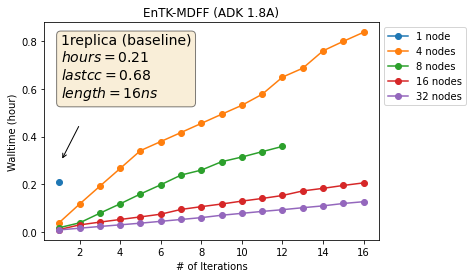

In [43]:
df_elapsed_acc = df_elapsed.cumsum()
#cosmetic to change starting at 1
df_elapsed_acc.index += 1
ax = df_elapsed_acc.plot(marker='o')
ax.set_xlabel("# of Iterations")
ax.set_ylabel("Walltime (hour)")
ax.set_title('EnTK-MDFF (ADK 1.8A)')

textstr = '\n'.join((
    r'1replica (baseline)' ,
    r'$hours=%.2f$' % (df_elapsed['1replica'][0], ),
    r'$last cc=%.2f$' % (df_cc['one_replica_cc'][1], ),
    r'$length=%s$' % ('16ns', )))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.annotate("", xy=(1.1, 0.3), xytext=(2, 0.45),
             arrowprops=dict(arrowstyle="->"))

ax.legend(['1 node', '4 nodes', '8 nodes', '16 nodes', '32 nodes'],bbox_to_anchor=(1.0, 1))

In [44]:
df_elapsed_acc

,1replica,4replica,8replica,16replica,32replica
1,0.207778,0.038889,0.017222,0.009444,0.007778
2,NaN,0.116389,0.037500,0.028889,0.015000
3,NaN,0.191667,0.078056,0.040556,0.022222
4,NaN,0.266111,0.117500,0.051667,0.029167
5,NaN,0.341111,0.158889,0.062500,0.036111
6,NaN,0.379167,0.197500,0.073889,0.043889
7,NaN,0.417222,0.238333,0.093889,0.051667
8,NaN,0.455556,0.259167,0.105556,0.059444
9,NaN,0.493889,0.294444,0.116667,0.069444
10,NaN,0.531667,0.314167,0.128889,0.077500


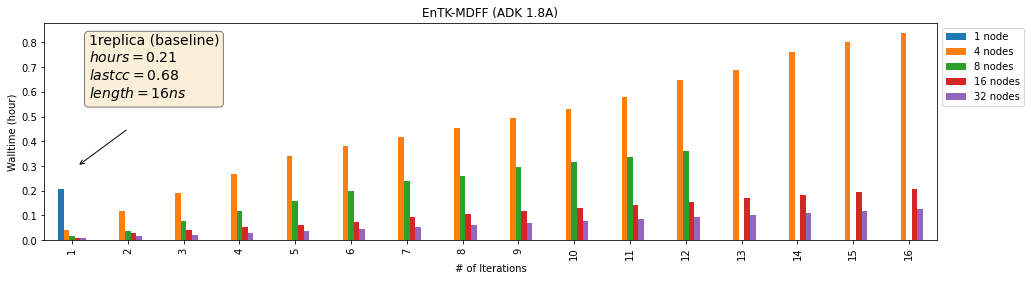

In [8]:
#df_elapsed_acc = df_elapsed.cumsum()
ax = df_elapsed_acc.plot.bar(figsize=(16,4))
ax.set_xlabel("# of Iterations")
ax.set_ylabel("Walltime (hour)")
ax.set_title('EnTK-MDFF (ADK 1.8A)')

x = 30*np.random.randn(10000)
mu = x.mean()
median = np.median(x)
sigma = x.std()
textstr = '\n'.join((
    r'1replica (baseline)' ,
    r'$hours=%.2f$' % (df_elapsed['1replica'][0], ),
    r'$last cc=%.2f$' % (df_cc['one_replica_cc'][1], ),
    r'$length=%s$' % ('16ns', )))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.annotate("", xy=(0.1, 0.3), xytext=(1, 0.45),
             arrowprops=dict(arrowstyle="->"))

ax.legend(['1 node', '4 nodes', '8 nodes', '16 nodes', '32 nodes'],bbox_to_anchor=(1.0, 1))
#plt.tight_layout()


In [9]:
df_elapsed_sec

,1replica,4replica,8replica,16replica,32replica
0,748.0,140,62.0,34,28
1,NaN,279,73.0,70,26
2,NaN,271,146.0,42,26
3,NaN,268,142.0,40,25
4,NaN,270,149.0,39,25
5,NaN,137,139.0,41,28
6,NaN,137,147.0,72,28
7,NaN,138,75.0,42,28
8,NaN,138,127.0,40,36
9,NaN,136,71.0,44,29


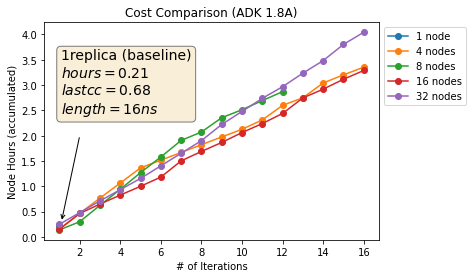

In [10]:
df_node_hours_acc = df_node_hours.cumsum()
df_node_hours_acc.index += 1
ax = df_node_hours_acc.plot(marker='o')
ax.set_xlabel("# of Iterations")
ax.set_ylabel("Node Hours (accumulated)")
ax.set_title('Cost Comparison (ADK 1.8A)')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, .88, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.annotate("", xy=(1.1, 0.3), xytext=(2, 2),
             arrowprops=dict(arrowstyle="->"))

ax.legend(['1 node', '4 nodes', '8 nodes', '16 nodes', '32 nodes'],bbox_to_anchor=(1.0, 1))
#plt.tight_layout()


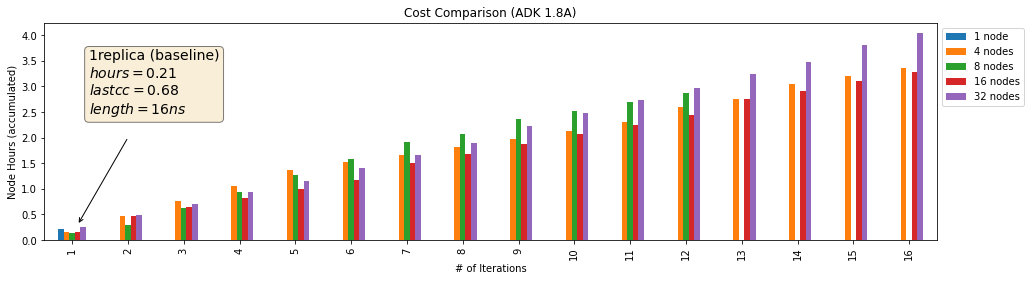

In [11]:
ax = df_node_hours_acc.plot.bar(figsize=(16,4))
ax.set_xlabel("# of Iterations")
ax.set_ylabel("Node Hours (accumulated)")
ax.set_title('Cost Comparison (ADK 1.8A)')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, .88, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.annotate("", xy=(0.1, 0.3), xytext=(1, 2),
             arrowprops=dict(arrowstyle="->"))

ax.legend(['1 node', '4 nodes', '8 nodes', '16 nodes', '32 nodes'],bbox_to_anchor=(1.0, 1))
#plt.tight_layout()


<AxesSubplot:>

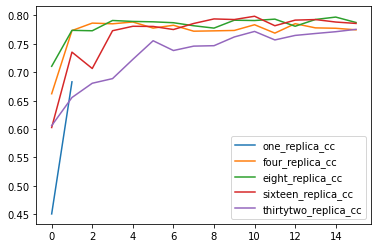

In [12]:
df_cc.plot()

In [13]:
df_cc

,one_replica_cc,four_replica_cc,eight_replica_cc,sixteen_replica_cc,thirtytwo_replica_cc
0,0.450613,0.662180,0.710503,0.602728,0.605972
1,0.683147,0.773388,0.773801,0.735439,0.655555
2,NaN,0.786543,0.773060,0.706624,0.680661
3,NaN,0.785334,0.791154,0.773127,0.688813
4,NaN,0.788497,0.789469,0.780957,0.722703
5,NaN,0.777748,0.788809,0.780661,0.755491
6,NaN,0.782750,0.787222,0.775225,0.738273
7,NaN,0.772303,0.781880,0.785883,0.746013
8,NaN,0.772895,0.777738,0.793903,0.746770
9,NaN,0.773613,0.791642,0.792819,0.762150
